In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
#für interactive violinplots (alternative zu seaborn)
import plotly.express as px #conda install plotly
# ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
    # Method 1: pip install ipykernel
    # Method 2: pip install --upgrade nbformat
        # Method 2 worked for me

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

import mysql.connector #pip install mysql-connector-python

# Table of contents

1. [Introduction](#introduction)
2. [Import and preprocessing](#import)
3. [Explorative Data Analysis](#eda)
4. [Geolocation Analysis](#loc)


## Introduction <a name="introduction"></a>
This ipynb file does this and that.

## Import and preprocessing <a name="import"></a>

In [2]:


# Replace these with your connection parameters
config = {
    'host': '127.0.0.1',
    'port':3306,
    'user': 'root',
    'password': 'GabaKDube731',
    'database': 'mlp'
}

# Connect to the MySQL Database
try:
    conn = mysql.connector.connect(**config)
    if conn.is_connected():
        print('Successfully connected to the database')
except mysql.connector.Error as e:
    print('Error:', e)

Successfully connected to the database


In [3]:
# function to read and create a DataFrame
def read_table_to_dataframe(connection, table_name):
    # example usage: df_temp = read_table_to_dataframe(conn, 'dta')
    query = f"SELECT * FROM {table_name}"
    try:
        return pd.read_sql(query, connection)
    except Error as e:
        print(f"The error '{e}' occurred")
        return None
    
df = read_table_to_dataframe(conn, 'dta')

C:\Users\gigim\AppData\Local\Temp\ipykernel_23348\1421185529.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


In [4]:
df.to_clipboard()

In [5]:
# Filter out None values from 'rooms' attribute
descriptions = [ 'modern', 'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum', 'bijou', 'neubau', 'balkon', 'charmant', 'erstbezug']

# Create new attributes for each unique value
for item in descriptions:
    df[item] = df['description'].apply(lambda x: 1 if item in (x or '').lower() else 0)

#df = df.drop(columns=['description'])
# test this to add 'keine_description' if nothing is found
# Add 'keine_description' if no descriptions are found
df['keine_description'] = df[descriptions].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)

# Append new Value to list for Violinplots
descriptions.append('keine_description')

In [6]:
# Filter out None values from 'rooms' attribute
filtered_rooms = [room for room in df['rooms'] if room is not None]

# Extract unique values
unique_rooms = list(set(filtered_rooms))

# Sort unique values
unique_rooms.sort()

# Create new attributes for each unique value
for room_type in unique_rooms:
    df[room_type] = df['rooms'].apply(lambda x: 1 if x == room_type else 0)

# Remove the word 'Zimmer' from the 'rooms' column and convert to numeric
    # Value will be usefull for EDA
df['rooms'] = df['rooms'].str.replace(' Zimmer', '').astype(float)

# Filter out rows where the sum of these specific columns is zero (might have to be moved up)
df = df[df[unique_rooms].sum(axis=1) > 0]


In [7]:
# one Hot encode wbauj
# Filter out None values from 'rooms' attribute
wbauj_list = [wbauj for wbauj in df['wbauj'] if wbauj is not None]

# Extract unique values
wbauj_list = list(set(wbauj_list))
wbauj_list

# Create new attributes for each unique value
for item in wbauj_list:
    df[item] = df['wbauj'].apply(lambda x: 1 if x == item else 0)


# Convert columns as string
df.columns = ['y' + str(col) if isinstance(col, int) else col for col in df.columns]

In [8]:
df.to_clipboard()

In [9]:
# df = df.drop(columns=['latitude', 'longitude'])
# Keep this for now

## Explorative Data Analysis <a name="eda"></a>

In [10]:
df[:5].to_clipboard()


In [11]:
df.columns

Index(['price', 'address', 'description', 'rooms', 'size', 'latitude',
       'longitude', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov',
       'wbauj', 'modern', 'erstvermietung', 'zentral', 'see', 'neu', 'stöckig',
       'traum', 'bijou', 'neubau', 'balkon', 'charmant', 'erstbezug',
       'keine_description', '1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer',
       '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer',
       '5.5 Zimmer', '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer', 'y0',
       'y1999', 'y2000', 'y2001', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007',
       'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015',
       'y2016', 'y2017', 'y2018', 'y2019', 'y2020', 'y2021', 'y2022', 'y2023',
       'y2024'],
      dtype='object')

In [12]:
# Generate descriptive statistics
display(df[['price', 'address', 'rooms', 'size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov', 'wbauj']].describe())
display(df[['modern', 'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum', 'bijou', 'neubau', 'balkon', 'charmant', 'erstbezug']].describe())
display(df[['1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer', '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer', '5.5 Zimmer', '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer']].describe())

,price,rooms,distance_hospital,lr_day,lr_night,distance_ov,wbauj
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,3185.027741,2.729855,1.151133,47.236856,39.237120,0.140562,1667.871863
std,1430.368345,1.241375,0.816590,9.039382,9.476521,0.070928,749.385629
min,375.000000,1.000000,0.026021,9.300000,0.000000,0.016292,0.000000
25%,2200.000000,2.000000,0.566880,40.500000,32.300000,0.091067,1999.000000
50%,2890.000000,2.500000,0.953037,46.300000,38.100000,0.131931,1999.000000
75%,3800.000000,3.500000,1.510547,54.000000,45.300000,0.179911,1999.000000
max,12653.000000,7.500000,3.806936,70.200000,61.600000,0.530692,2024.000000


,modern,erstvermietung,zentral,see,neu,stöckig,traum,bijou,neubau,balkon,charmant,erstbezug
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.113606,0.054161,0.071334,0.062087,0.073976,0.002642,0.034346,0.014531,0.023778,0.023778,0.023778,0.010568
std,0.317542,0.226485,0.257552,0.241473,0.261905,0.051366,0.182237,0.119745,0.152458,0.152458,0.152458,0.102324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,1 Zimmer,1.5 Zimmer,2 Zimmer,2.5 Zimmer,3 Zimmer,3.5 Zimmer,4 Zimmer,4.5 Zimmer,5 Zimmer,5.5 Zimmer,6 Zimmer,6.5 Zimmer,7 Zimmer,7.5 Zimmer
count,757.000000,757.000000,757.000000,757.000000,757.00000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.174373,0.068692,0.101717,0.199472,0.09247,0.191546,0.038309,0.093791,0.006605,0.019815,0.006605,0.002642,0.002642,0.001321
std,0.379680,0.253097,0.302476,0.399867,0.28988,0.393777,0.192068,0.291731,0.081056,0.139456,0.081056,0.051366,0.051366,0.036346
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.to_clipboard()


In [14]:
# Melt the DataFrame to long format for Plotly
melted_df = df.melt(id_vars=['price', 'rooms'], value_vars=descriptions, var_name='description', value_name='presence')

# Filter to only include rows where the description is present
filtered_df = melted_df[melted_df['presence'] == 1]

# Create the violin plot using Plotly
fig = px.violin(filtered_df, x='rooms', y='price', color='description', box=True, points='all', hover_data=['description'])
fig.update_layout(title='Violin Plot of Price by Rooms and Description', xaxis_title='Rooms', yaxis_title='Price')
fig.show()

In [15]:
# List of build years to be considered (assuming unique values from 'wbauj')
wbauj_list = list(set(df['wbauj']))

# Create new binary columns for each build year
for year in wbauj_list:
    df['y' + str(year)] = df['wbauj'].apply(lambda x: 1 if x == year else 0)

# Update the wbauj_list to match the new column names
wbauj_list_str = ['y' + str(year) for year in wbauj_list]

# Melt the DataFrame to long format for Plotly
melted_df = df.melt(id_vars=['price', 'rooms'], value_vars=wbauj_list_str, var_name='Build year', value_name='presence')

# Filter to only include rows where the build year is present
filtered_df = melted_df[melted_df['presence'] == 1]

# Create the violin plot using Plotly
fig = px.violin(filtered_df, x='rooms', y='price', color='Build year', box=True, points='all', hover_data=['Build year'])
fig.update_layout(title='Violin Plot of Price by Rooms and Build Year', xaxis_title='Rooms', yaxis_title='Price')
fig.show()

In [16]:
# Melt the DataFrame to long format
melted_df = df.melt(value_vars=['lr_day', 'lr_night'], var_name='Time of Day', value_name='Sound Level')

# Create the violin plot using Plotly
fig = px.violin(melted_df, x='Time of Day', y='Sound Level', box=True, points='all')
fig.update_layout(title='Violin Plot of Sound Levels by Time of Day', xaxis_title='Time of Day', yaxis_title='Sound Level')
fig.show()

# Creates a boxplot and violinport

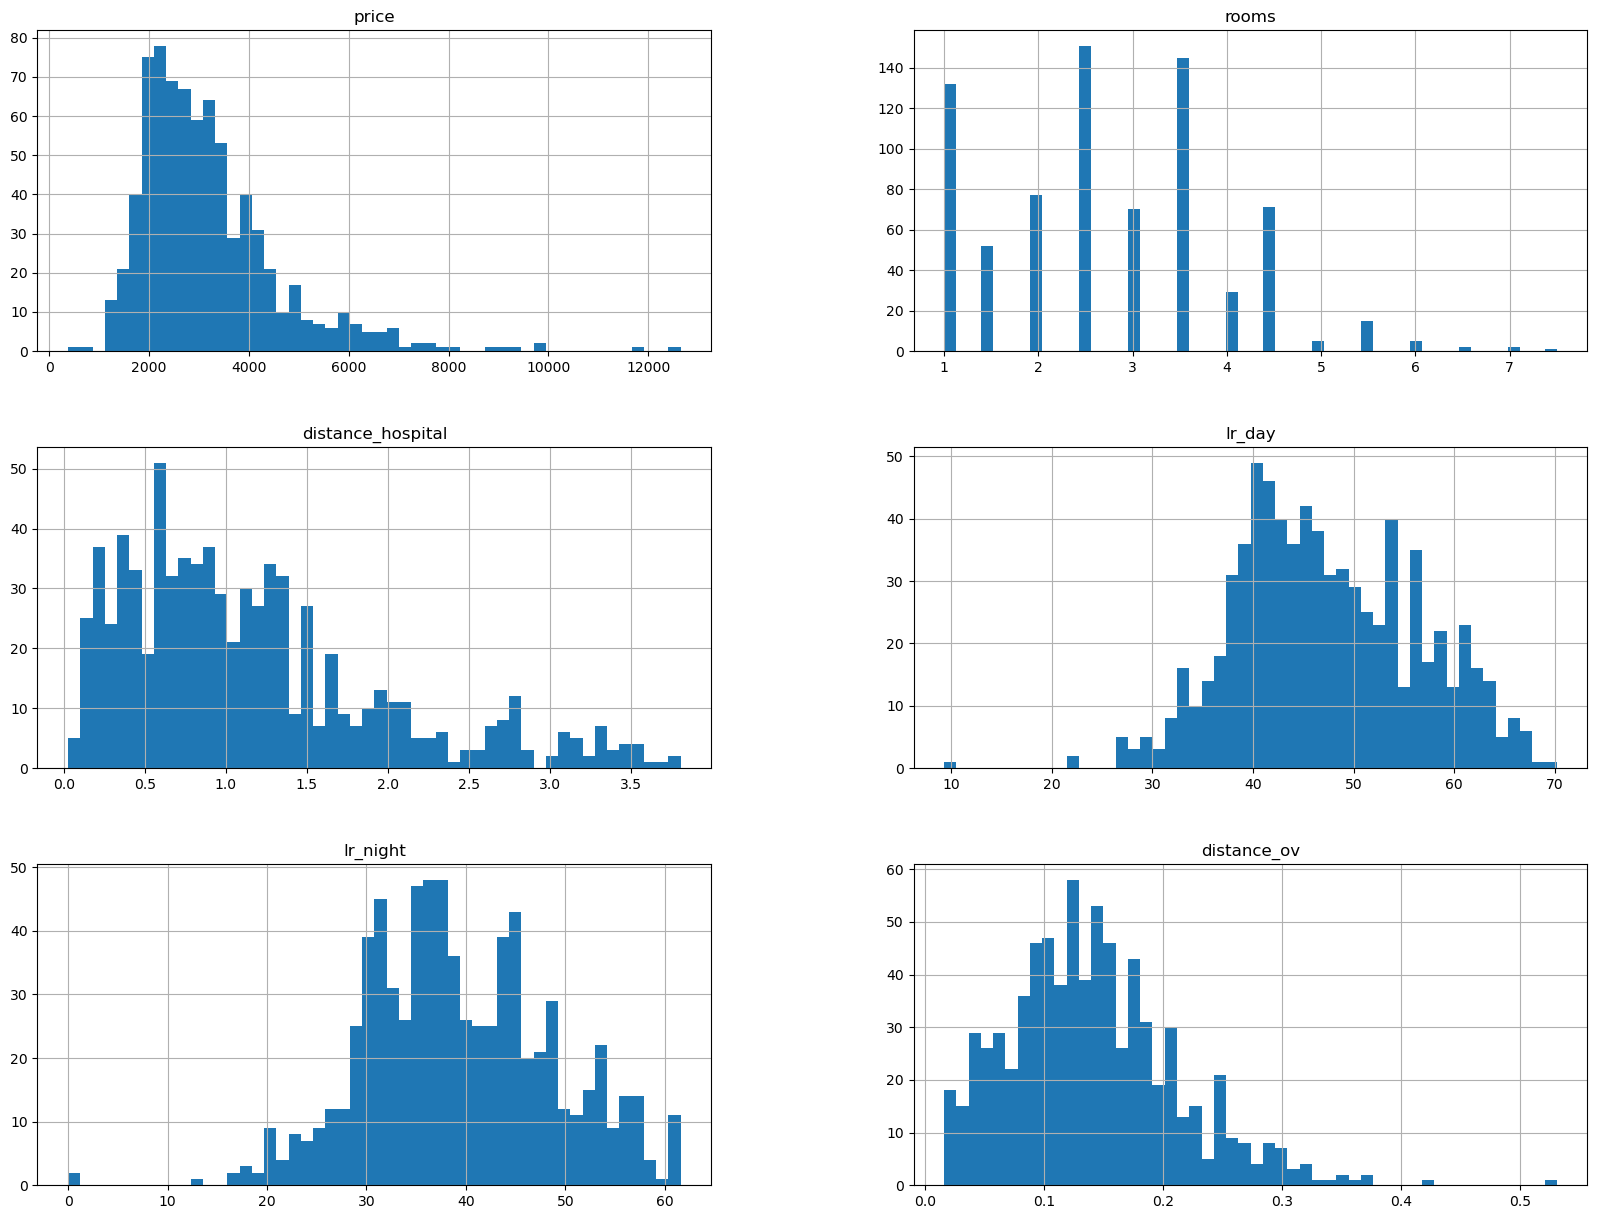

<Figure size 1200x800 with 0 Axes>

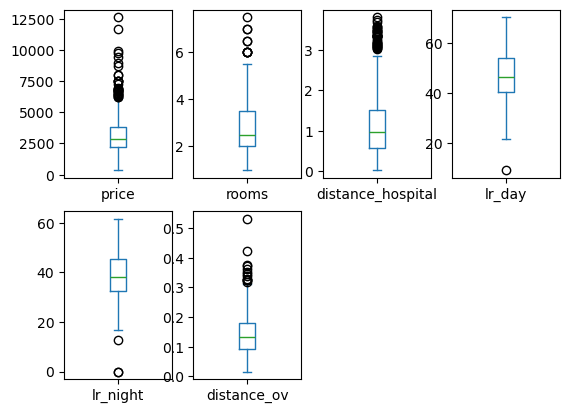

In [17]:
# Histograms for numerical attributes
df[['price', 'rooms', 'size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov']].hist(bins=50, figsize=(20,15))
plt.show()

# Box plots for examining distributions and to spot outliers
num_attributes = ['price', 'rooms', 'size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov']
plt.figure(figsize=(12, 8))
df[num_attributes].plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()


c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



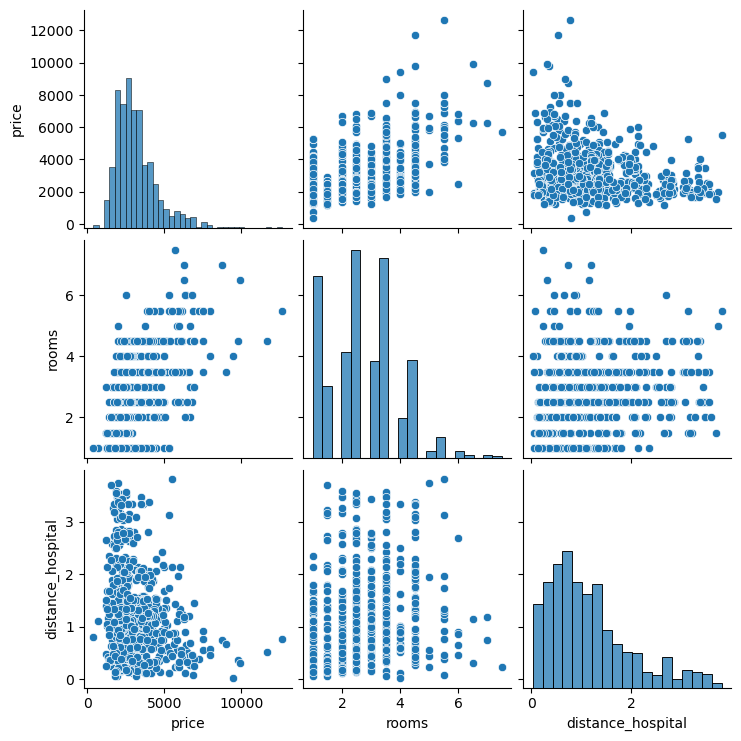

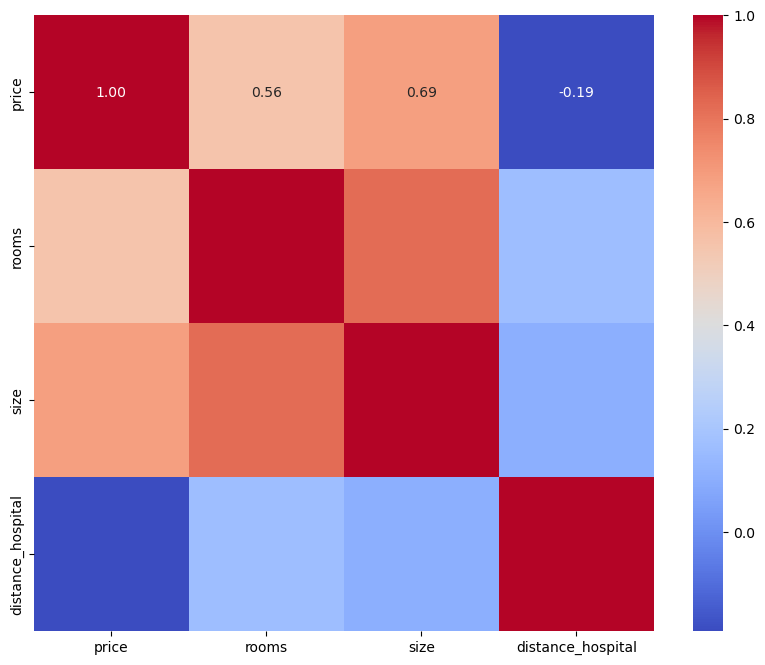

In [18]:
# Pair plot of selected variables
sns.pairplot(df[['price', 'rooms', 'size', 'distance_hospital']])
plt.show()

# Correlation matrix heatmap
corr_matrix = df[['price', 'rooms', 'size', 'distance_hospital']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [19]:
df.to_clipboard()

c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\gigim\anaconda3\envs\mlpenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



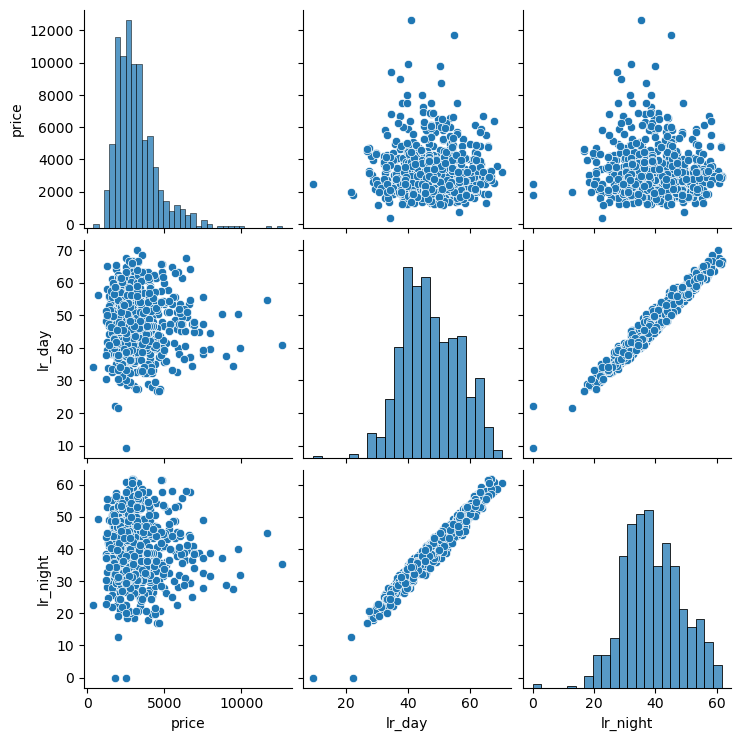

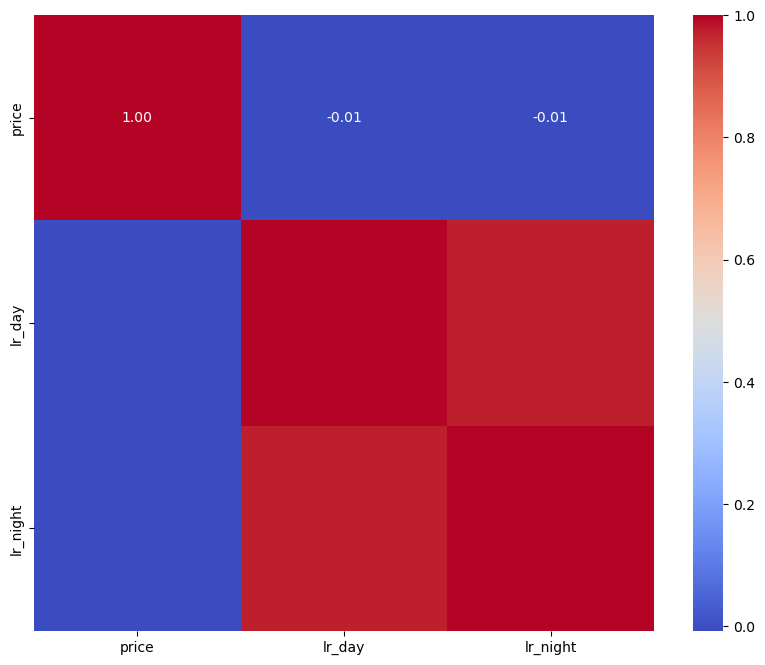

In [20]:
# Pair plot of selected variables
sns.pairplot(df[['price', 'lr_day', 'lr_night']])
plt.show()

# Correlation matrix heatmap
corr_matrix = df[['price', 'lr_day', 'lr_night']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [21]:
df.columns

Index(['price', 'address', 'description', 'rooms', 'size', 'latitude',
       'longitude', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov',
       'wbauj', 'modern', 'erstvermietung', 'zentral', 'see', 'neu', 'stöckig',
       'traum', 'bijou', 'neubau', 'balkon', 'charmant', 'erstbezug',
       'keine_description', '1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer',
       '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer',
       '5.5 Zimmer', '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer', 'y0',
       'y1999', 'y2000', 'y2001', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007',
       'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015',
       'y2016', 'y2017', 'y2018', 'y2019', 'y2020', 'y2021', 'y2022', 'y2023',
       'y2024'],
      dtype='object')

In [22]:
### violinplots test
df.to_clipboard()

In [23]:
# Save the DataFrame to a pickle file
df.to_pickle('final_dataframe.pkl')

## Geolocatoin Analysis <a name="loc"></a>

In [24]:
df

,price,address,description,rooms,size,latitude,longitude,distance_hospital,lr_day,lr_night,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
0,4032,"Käferholzstrasse 42, 8057 Zürich",Modernes Wohnen im Guggachpark,4.5,114,47.401913,8.531829,0.888102,32.2,25.3,...,0,0,0,0,0,1,0,0,0,0
1,3220,"Grabenwies 2, 8057 Zürich",Ihre neue Traumwohnung!,2.5,90,47.401535,8.536803,1.485068,50.3,42.8,...,0,0,0,0,0,0,0,0,0,0
2,1720,"Herrligweg 9, 8048 Zürich",Zentrale 1.5 Zimmerwohnung,1.5,24,47.389893,8.484478,2.688730,42.7,36.2,...,0,0,0,0,0,0,1,0,0,0
3,2600,"Hagenholzstrasse 59, 8050 Zürich",One-bedroom apartment in the heart of Zurich,2.5,54,47.414658,8.555408,0.647989,61.6,50.3,...,0,0,0,0,0,0,0,0,1,0
4,4090,"Widmerstrasse 87, 8038 Zürich",Erstvermietung - Schöner wohnen in Zürich-Süd:...,4.5,105,47.334984,8.531518,1.951291,48.1,36.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,3250,"Nordstrasse 290, 8037 Zürich","Wunderschöne, frisch gemalte 4.5-Zimmerwohnung",4.5,70,47.395435,8.524005,0.427301,55.9,47.1,...,0,0,0,0,0,0,0,0,0,0
753,2800,"Badenerstrasse 434, 8004 Zürich",Apartment in Zurich - Kreis 4,2.5,94,47.380623,8.505616,1.555261,48.4,43.4,...,0,0,0,0,0,0,0,0,0,0
754,1930,"Rümlangstrasse 57, 8052 Zürich",Wohnen wie in den Ferien,2.5,37,47.429279,8.541497,1.872843,45.5,39.7,...,0,0,0,0,0,0,0,0,0,0
755,2912,"Langstrasse 231, 8005 Zürich",Nachmieter gesucht für traumhafte Dachwohnung ...,3.5,55,47.383877,8.530736,0.352235,66.0,60.6,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx #conda install contextily // Didnt work i used 'pip install contextily' instead


# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='wbauj', legend=True, legend_kwds={'label': "Build Year"})

# Add basemap from contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Show plot
plt.show()


NameError: name 'df' is not defined

## Descision tree regressor

In [20]:
import numpy as np
import pandas as pd
# conda install scikit-learn Version=1.4.2
from sklearn.tree import DecisionTreeRegressor # had to sign out for it to work
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [42]:

# Load the Boston housing dataset

data = df.copy()

columns_x = ['size',
       'distance_hospital',            'lr_day',          'lr_night',
             'distance_ov',             'wbauj',            'modern',
          'erstvermietung',           'zentral',               'see',
                     'neu',           'stöckig',             'traum',
                   'bijou',            'neubau',            'balkon',
                'charmant',         'erstbezug',          '1 Zimmer',
              '1.5 Zimmer',          '2 Zimmer',        '2.5 Zimmer',
                '3 Zimmer',        '3.5 Zimmer',          '4 Zimmer',
              '4.5 Zimmer',          '5 Zimmer',        '5.5 Zimmer',
                '6 Zimmer',        '6.5 Zimmer',          '7 Zimmer',
              '7.5 Zimmer',                   'y0', 'y1999', 'y2000', 'y2001',
       'y2003', 'y2004', 'y2005', 'y2006', 'y2008', 'y2009', 'y2010', 'y2011',
       'y2012', 'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018', 'y2019',
       'y2020', 'y2021', 'y2022', 'y2023', 'y2024']
X = pd.DataFrame(data[columns_x], columns=columns_x)
y = pd.Series(data['price'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42) #the lower the max depth the better the r² score 3 or 4 i although mean squared error gets better over time

# Train the model
tree_reg.fit(X_train, y_train)

# Predict using the model
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1980264.1194956542
R^2 Score: 0.09296211189640236


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your original DataFrame and it's already been loaded with the data
data = df.copy()

# Define columns and target
columns_x = [
    'size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov', 'wbauj',
    'modern', 'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum',
    'bijou', 'neubau', 'balkon', 'charmant', 'erstbezug', '1 Zimmer',
    '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer', '3 Zimmer', '3.5 Zimmer', '4 Zimmer',
    '4.5 Zimmer', '5 Zimmer', '5.5 Zimmer', '6 Zimmer', '6.5 Zimmer', '7 Zimmer',
    '7.5 Zimmer', 'y0', 'y1999', 'y2000', 'y2001', 'y2003', 'y2004', 'y2005', 'y2006', 
    'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015', 'y2016', 
    'y2017', 'y2018', 'y2019', 'y2020', 'y2021', 'y2022', 'y2023', 'y2024'
]
X = data[columns_x]
y = data['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add predictions back to the test DataFrame
X_test['predicted_price'] = y_pred

# Optionally, create a comprehensive DataFrame with original index
results_df = X_test.join(data['price'], how='left')
results_df.rename(columns={'price': 'actual_price'}, inplace=True)

# Display the results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
results_df  # Show the first few rows of the results DataFrame


Mean Squared Error: 1980264.1194956542
R^2 Score: 0.09296211189640236


,size,distance_hospital,lr_day,lr_night,distance_ov,wbauj,modern,erstvermietung,zentral,see,...,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024,predicted_price,actual_price
396,87,0.443022,47.8,40.8,0.165207,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,3191.936709,2920
248,52,0.541877,47.5,40.9,0.091858,2020,0,0,0,0,...,0,0,0,1,0,0,0,0,2729.395833,2890
215,20,0.606784,52.9,44.6,0.185044,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2587.885714,2377
353,50,0.171110,34.2,26.5,0.260753,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,2729.395833,2500
548,29,0.875294,55.7,48.6,0.208322,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2587.885714,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,34,0.221534,39.6,30.4,0.123700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2587.885714,3311
265,20,1.788458,60.0,50.9,0.076453,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1436.666667,1980
473,26,1.131843,58.4,52.3,0.156051,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,2065.642857,3207
464,227,3.806936,33.3,25.0,0.266409,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,5300.000000,5500


In [46]:
results_df['delta'] = results_df['actual_price'] - results_df['predicted_price']
# Sort the DataFrame by the delta column
sorted_df = results_df.sort_values(by='delta', ascending=False)  # or `ascending=True` for ascending order

In [47]:
sorted_df

,size,distance_hospital,lr_day,lr_night,distance_ov,wbauj,modern,erstvermietung,zentral,see,...,y2018,y2019,y2020,y2021,y2022,y2023,y2024,predicted_price,actual_price,delta
571,100,0.669732,37.4,28.9,0.144386,1999,0,0,0,1,...,0,0,0,0,0,0,0,3817.500,8990,5172.500
559,160,0.026021,34.4,27.6,0.127199,2015,0,0,0,0,...,0,0,0,0,0,0,0,5055.000,9450,4395.000
535,150,0.362236,50.3,39.9,0.209900,2022,0,0,0,0,...,0,0,0,0,1,0,0,6097.000,9800,3703.000
290,160,0.561518,38.1,32.4,0.286033,0,0,0,0,0,...,0,0,0,0,0,0,0,4683.000,7500,2817.000
41,109,2.134961,53.6,43.9,0.041342,1999,0,1,0,0,...,0,0,0,0,0,0,0,3993.875,5990,1996.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,87,0.403926,49.2,37.1,0.113873,2014,0,0,0,0,...,0,0,0,0,0,0,0,6332.000,3180,-3152.000
268,70,0.160503,57.1,48.6,0.124083,2009,0,0,0,0,...,0,0,0,0,0,0,0,6900.000,3400,-3500.000
497,70,0.178613,60.3,54.2,0.081564,1999,0,0,0,0,...,0,0,0,0,0,0,0,6900.000,2836,-4064.000
176,70,0.420454,57.2,44.3,0.095066,1999,0,0,0,0,...,0,0,0,0,0,0,0,6900.000,2570,-4330.000
